# Ejercicio de autoexplicación

## Enunciado

La cercha presentada a continuación representa un puente que utiliza una cercha
tipo K. El puente tiene una longitud de 24 m y una altura de 6 m. La sección de
cada barra es de  $ A = 0.002 \text{ m}^2 $  y su módulo de Young es 
$ E = 200 \text{ GPa} $. El puente está sometido a una carga total equivalente
a 2000 kN, distribuida como se muestra en la figura: 

<div align="center">
    <img src="img/cercha_k.svg">
</div>

Se busca determinar si alguna de las barras del puente supera el esfuerzo de
fluencia a tracción de  $ 330 \text{ MPa} $.


Actualmente, el notebook celdas de código con errores en algunas de sus líneas.
Se solicita corregirlas para resolver el problema planteado y agregar
explicaciones en celdas de texto en donde reflexiones sobre cómo corrigió
estos errores.


In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from plane_trusses import analysis

**1.** La siguiente celda de código contiene errores respecto a la representación
del problema planteado en el enunciado. **Corrija estos errores y
agregue una explicación en una celda posterior del notebook**.

In [3]:
nodes = np.array([
    [0,  0],
    [4,  0],
    [8,  0],
    [12, 0],
    [16, 0],
    [20, 0],
    [24, 0],
    [4,  6],
    [8,  6],
    [12, 6],
    [16, 6],
    [20, 6],
    [4,  3],
    [8,  3],
    [16, 3],
    [20, 3]])
cons = np.array([
    [-1, -1],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, -1],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0]], dtype=int)

loads = np.array([
    [0, 0],
    [0, -400e6],
    [0, -400e6],
    [0, -400e6],
    [0, -400e6],
    [0, -400e6],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0]])

elements = np.array([
    [0, 0,  1],
    [0, 1,  2],
    [0, 2,  3],
    [0, 3,  4],
    [0, 4,  5],
    [0, 5,  6],
    [0, 7,  8],
    [0, 8,  9],
    [0, 9,  10],
    [0, 10, 11],
    [0, 0,  7],
    [0, 6,  11],
    [0, 1,  12],
    [0, 2,  13],
    [0, 4,  14],
    [0, 5,  15],
    [0, 12, 7],
    [0, 13, 8],
    [0, 14, 10],
    [0, 15, 11],
    [0, 2,  12],
    [0, 3,  13],
    [0, 3,  14],
    [0, 4,  15],
    [0, 12, 8],
    [0, 13, 9],
    [0, 9,  14],
    [0, 10, 15],
    [0, 3,  9]], dtype=int)

mats = np.array([[200e9, 0.002]])

data = {
  "nodes": nodes,
  "cons": cons,
  "elements": elements,
  "loads": loads,
  "mats": mats}

<div class="alert-info">

Agregue un párrafo explicando lo siguiente:

- ¿En dónde estaba el error en la celda anterior?

- ¿Cuál era el error que tenía la celda anterior?

- ¿Cómo corrigió este error?

<div/>

In [4]:
disp = analysis(data)

**2.** La siguiente celda de código contiene errores en la función que calcula
los esfuerzos de una cercha plana a partir de las coordenadas de los nodos, la
conectividad de los elementos, las propiedades del material y los desplazamientos
nodales. **Corrija estos errores y agregue una explicación en una celda posterior
del notebook utilizando**.

In [5]:
def calc_esfuerzos_int(coords, eles, mats, desp):
    """Calcula los esfuerzos internos para una cercha plana.

    Parámetros
    ----------
    coords : ndarray (float)
        Arreglo con coordenadas de los nodos.
    eles : ndarray (int)
        Arreglo con información de los elementos: propiedades
        y conectividades.
    mats : ndarray (float)
        Arreglo con información de las propiedades de los elementos:
        módulo de Young y sección.
    desp : ndarray (float)
        Desplazamientos de los nodos.

    Retorna
    -------
    esfuerzos : ndarray (float)
        Arreglo con los esfuerzos axiales de cada elemento.
    """       
    neles = eles.shape[0]
    esfuerzos = np.zeros((neles))
    for cont in range(neles):
        ini = eles[cont, 1]
        fin = eles[cont, 2]
        longitud = np.linalg.norm(coords[fin, :] - coords[ini, :])
        mat_id = eles[cont, 0]
        young, area = mats[mat_id]
        long_nueva = np.linalg.norm(coords[fin, :] - coords[ini, :] +
                                    desp[fin, :] - desp[ini, :])
        elongacion = longitud - long_nueva
        esfuerzos[cont] = young * elongacion / (longitud * area) 
    return esfuerzos

<div class="alert-info">

Agregue un párrafo explicando lo siguiente:

- ¿Cuál era el error que tenía la celda anterior?

- ¿Cómo corrigió este error?

<div/>

In [6]:
esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)
esfuerzos / 330e6

array([-4619480.97962646, -1627206.65648268,  -853205.71270659,
        -853205.71270659, -1627206.65648268, -4619480.97962647,
       -2026872.50702863,  -294790.6028473 ,  -294790.6028473 ,
       -2026872.50702863, -2459132.18696733, -2459132.18696733,
       -1657476.7991212 ,  -946827.98004031,  -946827.98004031,
       -1657476.7991212 , -1647694.3560871 ,  -797033.70888027,
        -797033.70888027, -1647694.3560871 , -1525008.54849723,
        -210592.92791111,  -210592.92791111, -1525008.54849723,
       -1167777.25210494,   117988.65372912,   117988.65372912,
       -1167777.25210494,  -151515.15151515])

**3.** La siguiente celda de código contiene errores en la función que visualiza
los esfuerzos de la cercha mediante colores. **Corrija estos errores y
agregue una explicación en una celda posterior
del noteboo**.

In [7]:
def vis_esfuerzos(coords, eles, esfuerzos, desp=None):
    """Visualiza los esfuerzos de la cercha.

    El color azul representa un elemento sometido a compresión
    y el color rojo, uno sometida a tracción. La intensidad
    del color representa la magnitud del esfuerzo.

    Parámetros
    ----------
    coords : ndarray (float)
        Arreglo con coordenadas de los nodos.
    eles : ndarray (int)
        Arreglo con información de los elementos: propiedades
        y conectividades.
    esfuerzos : ndarray (float)
        Arreglo con los esfuerzos de cada elemento.
    desp : ndarray (float), opcional
        Arreglo con los desplazamientos de cada nodo, por defecto None.
    """      
    esfuerzo_max = max(-esfuerzos.min(), esfuerzos.max())  
    esfuerzo_escalado = 0.5*(esfuerzos + esfuerzo_max)/esfuerzo_max 
    x, y = coords.T
    if desp is None:
        desp = np.zeros_like(coords)
    for cont, barra in enumerate(eles[:, 1:]):
        color = plt.cm.seismic(esfuerzos[cont]) # Error
        plt.plot(x[barra] + desp[barra, 0], y[barra] + desp[barra, 1],
                color='red', lw=3) # Error
        plt.plot(x + desp[:, 0], y + desp[:, 1], lw=0, marker="o",
             mec="#3c3c3c", mfc="#ffffff")  
    plt.axis("image")

<div class="alert-info">

Agregue un párrafo explicando lo siguiente:

- ¿Cuál era el error que tenía la celda anterior?

- ¿Cómo corrigió este error?

<div/>

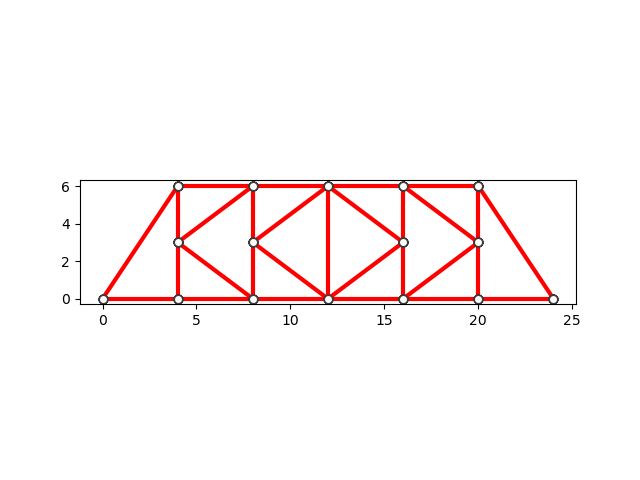

In [8]:
plt.figure()
vis_esfuerzos(nodes, elements, esfuerzos, desp=None)